# 1 hash (h1) for Main Title (i.e., dont use) 
## 2 hashes (h2) for Topic (e.g., Data Preparation)
### 3 hashes (h3) for sub-topic (e.g., under Data Preparation, should have a 3 hash called maybe "Importing Data"
#### 4 hashes (h4) for findings, analysis etc
No hash for explanations/comments

#### To standardize formating. 
#### Add more if anything to take note! DELETE AT THE END.
`USE THIS THINGY for variable names`

Anything to note WRITE HERE:


#### ROUGH PLAN
0) Library Setup

1) Data Description/Explanation or something (in place of Sample Collection). *Practical Motivation

2) Data Preparation. *Problem Formulation (im thinking we do this in 1.)

2.1 Data Cleaning

2.2 Feature Engineering... etc

3) Exploratory Data Analysis

4) Might Do Data Cleaning etc again depending on what we find in EDA

5) Modelling

6) Optimization (choose best performing model, use Grid search, etc.)

7) Findings/Conclusions?

8) References


## <u><center>ANYTHING BELOW THIS IS THE ACTUAL NOTEBOOK!</center></u>
-------------------------------------------------------------------------------------------------------------------------------------------------------

#### SC1015 FCSA Group 1: 
- Gay Ming Kai       (C230114@e.ntu.edu.sg)
- Jacob Ong Jia Chun (JONG163@e.ntu.edu.sg)
- Lim Zu Liang       (E230184@e.ntu.edu.sg)

<h1><center><u>Adult Census Income</u></center></h1>

// this will be the Table of contents. Do last.

## Chapter 0. Library Setup

In [2]:
def separate():
    print('*' * 40)

print("Data Analysis and Wrangling Packages")
import pandas as pd # Library for data processing and analysis.
import numpy as np # Library for numerical computing (provides support for multi-dimensional arrays and matrices).
import scipy as sp # Library for scientific computing and advanced mathematics.
print("- pandas version: {}". format(pd.__version__))
print("- NumPy version: {}". format(np.__version__))
print("- SciPy version: {}". format(sp.__version__)) 
separate()
print("Visualization Packages")
import matplotlib as plt # Plotting library
import seaborn as sns  # Statistical data visualization based on matplotlib
print("- matplotlib version: {}".format(plt.__version__))
print("- seaborn version: {}".format(sns.__version__))
separate()

print("Modelling Packages")
import sklearn as sk # Collection of machine learning algorithms.
print("- scikit-learn version: {}". format(sk.__version__))
separate()

Data Analysis and Wrangling Packages
- pandas version: 2.1.4
- NumPy version: 1.24.3
- SciPy version: 1.11.4
****************************************
Visualization Packages
- matplotlib version: 3.8.0
- seaborn version: 0.12.2
****************************************
Modelling Packages
- scikit-learn version: 1.3.0
****************************************


## Chapter 1. Dataset Overview

#### The dataset `(https://archive.ics.uci.edu/ml/datasets/Adult)` was donated by Ronny Kohavi and Barry Becker in 1994 and is currently managed by the University of California Irvine.

The dataset has 1 target, 14 features, and 32561 instances, 

The 14 features are: 
- `age`
- `workclass`
- `fnlwgt`
- `education`
- `education-num`
- `marital-status`
- `occupation `
- `relationship`
- `race`
- `sex`
- `capital-gain`
- `capital-loss`
- `hours-per-week`
- `native-country`

The target is `income`.

#### General Note:
- Text-based values have an additional space in front (e.g., `sex` --> " Male").

#### Data Preparation Note:
- The dataset noted that there are missing values in 3 features: `workclass`, `occupation`, and `native-country`.
- A thorough examination of all other features is still necessary for potential missing values.
- After identifying the missing values, we will rectify them in Data Preparation.

#### Exploratory Data Analysis Note:
- The feature `fnlwgt`, short for "Final Weight," denotes an estimated count of individuals represented by each row in the dataset. For instance, a given row might have `fnlwgt` = 2500, `age` = 50, `race` = " White", `sex` = " Female", indicating that approximately 2500 people share these characteristics. Given this interpretation, the `fnlwgt` feature is essentially a cardinal number representing group size and is logically independent of the target label. To verify this assumption, we intend to conduct an analysis (in Exploratory Data Analysis) to assess whether `fnlwgt` influences the target or not.
- The feature `education-num` seems to correspond to the numerical representation of the `education` feature. This means that each value in `education` is mapped to a corresponding numerical value in `education-num`. For instance, "HS-grad" in `education` might be represented as 9 in `education-num`. We will confirm this in Exploratory Data Analysis.  

#### Feature Engineering Note:
- If our analysis confirms that `fnlwgt` has no significant impact on the target label, we will drop the feature.- 
Similarly, if our analysis confirm that `education-num` is derived from `education`,  indicating redundancy, we will remove one of the features during the Feature Engineering process. Given that machine learning models generally perform better with numerical dat, we will choose to drop `education` over `education-num`.

## Chapter 2. Data Preparation

### 2.1 Import Dataset as Dataframe

In [3]:
# Aquiring data.

# Reading a .data file (that does not have headers) into DataFrame.
adult_data = pd.read_csv('data/adult.data', delimiter=",", header=None) 

# Since the dataset file does NOT provide the headers, we have to add them in ourselves.
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                "hours-per-week", "native-country", "income"]

# Assign column names to DataFrame.
adult_data.columns = column_names

# Check & First look.
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.2 Identify and Remove Missing Values

In [3]:
# Look for NULL (missing) values in the dataset.
adult_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Findings:
- Appears to not have any null/missing values, but Dataset Overview mentioned that missing values exists.
- Missing values may be replaced with a representative value (e.g., "MISSING").

#### Choices:
- Option A: Peek at the data specifically to look for missing values.
- Option B: Find all the possible values of the three features (categorical) that are said to have missing data.

#### Perform:
- Option B as it is more robust (merely peeking head and tail may not show us the missing data).

In [4]:
# Option B.
print(adult_data["workclass"].value_counts())
separate()
print(adult_data["occupation"].value_counts())
separate()
print(adult_data["native-country"].value_counts())
separate()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
****************************************
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64
****************************************
native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         1

#### Findings:
- It seems that missing values are denoted as " ?".

#### Perform
- Check for the presence of missing values in all features.

In [4]:
# Check all presence and count of " ?" in the dataset.
def check_missing():
    print("Number of \" ?\" in:\n")
    print("Column", 11*' ', "Count")
    print("-"*25)
    for i in adult_data.columns: 
        t = adult_data[i].value_counts() 
        index = list(t.index)
        print(i, end="")
        # For styling purposes.
        x = 20 - len(i) 
        for j in index:
            temp = 0
            if j == " ?":
                # Once a '?' is found, print the number of '?' in the feature.
                print (x * ' ', t[" ?"]) 
                temp = 1
                break
        if temp == 0:
            # '?' is absent from all rows of a specific feature.
            print (x * ' ', "0") 
    separate()
    print("Row count: ", len(adult_data))
    separate()
check_missing()

Number of " ?" in:

Column             Count
-------------------------
age                  0
workclass            1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       583
income               0
****************************************
Row count:  32561
****************************************


#### Findings:
- Just like what the dataset said, only `workclass`, `occupation`, and `native-country` contains missing data.
- They are all categorical features (replacing with mean or median is not viable).

#### Choices:
- Option A: Remove rows containing missing data.<br>
There are a maximum of 4262 missing data points (assuming no overlaps), which comprise about 13% of the total dataset.

- Option B: Remove the columns that contain missing data (`workclass`, `occupation`, and `native-country`).<br>
These three features are intuitively crucial and likely to significantly impact the target `income`.
 
- Option C: Predict missing classification data based on other variables in the dataset using classification models like logistic regression.<br>
Viable but can be inaccurate and time-consuming.
  
- Option D: Impute missing data using the respective features' mode.<br>
It might skew the data and affect the model's prediction in later parts.

#### Perform:
- Option A. <br>Given that we have 14 features, even after removing the missing values, we would still have approximately 28 thousand data points, which is more than sufficient for reliable analysis and prediction. and prediction.

In [6]:
# Option A.
adult_data = adult_data.drop(adult_data[
                             (adult_data["workclass"] == " ?") | 
                             (adult_data["occupation"] == " ?") | 
                             (adult_data["native-country"] == " ?")].index)

# Check if successfully removed.
check_missing()

Number of '?' in:

Column             Count
-------------------------
age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
****************************************
Row count:  30162
****************************************


### 2.3 Peeks and Checks

In [7]:
# Check features' datatypes.
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [8]:
# Basic statistical information of the numerical features. 
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Basic statistical information of the catergorical features.
adult_data[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,9840,14065,4038,12463,25933,20380,27504


In [10]:
#Basic statistical information of response
adult_data['income'].describe()

count      30162
unique         2
top        <=50K
freq       22654
Name: income, dtype: object

In [11]:
# Peek first 5 rows.
adult_data.head(5) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# Peek last 5 rows.
adult_data.tail() 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#### Findings:
- Features `age`, `education-num`, `fnlwgt`, `capital-gain`, `capital-loss`, `hours-per-week` are numerical.
- Features `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `native-country` are categorical.
- Feature `sex` and target `income` are dichotomous/binary (also categorical).

#### Feature Engineering Note:
- Encode all categorical columns to numerical values as machine learning algorithms work better with numerical values.
- Feature `sex` and target `income` can be converted to binary (1 or 0).
- Could potentially bin the numerical features.

## Chapter 3. Problem Formulation

### Utilize census (survey) data to forecast whether the earnings of a particular demographic surpass $50k annually.

In [13]:
# Problem statement: Predict whether the income of a specific group of people exceeds $50K/yr or not based on census (survey) data. 
# This problem is a binary classification problem.

## Chapter 4. Exploratory Data Analysis

### 4.1. Exploring the Response

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


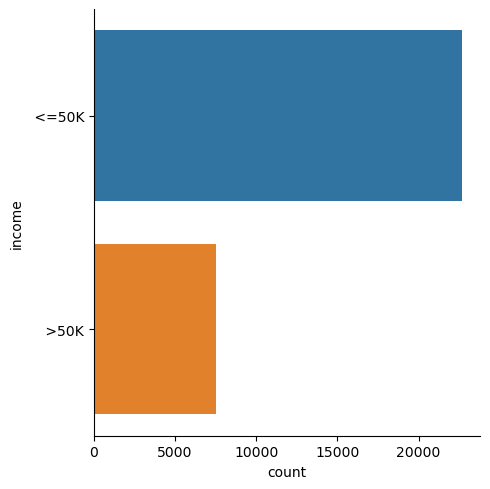

In [14]:
sns.catplot(y = 'income', data = adult_data, kind = "count")

In [15]:
print("Number of data in each Count catergory:\n")
print("Income", 11*' ', "Counter")
print("-"*25)
adult_data_gb = adult_data.groupby('income')
i = "Income >= 50000"
print(i, end="")
x = 20 - len(i) # For styling purposes
print (x * ' ', adult_data_gb['income'].count()[0])
i = "Income < 50000"
print(i, end="")
x = 20 - len(i) # For styling purposes
print (x * ' ', adult_data_gb['income'].count()[1])

Number of data in each Count catergory:

Income             Counter
-------------------------
Income >= 50000      22654
Income < 50000       7508


#### Findings
- Data is more concentrated towards income >= 50000

### 5.2. Exploring the Numerical Predictors

#### age

Important Data for age 

Descriptor         Value
-------------------------
Mean               38.44
Std                13.13
Q1                 28.0
Median             37.0
Q3                 47.0
Outliers           169


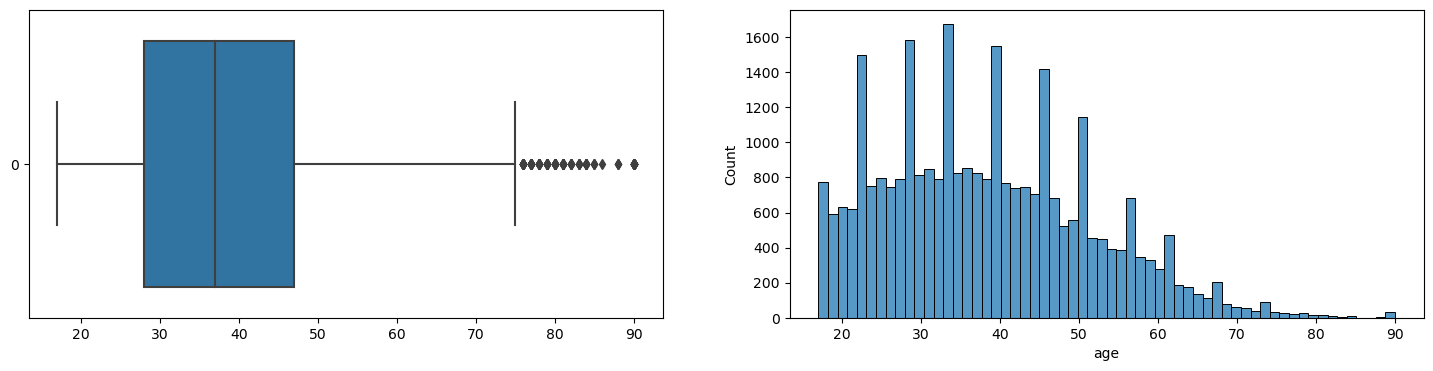

In [16]:
def print_numerical_predictor(n_p):
    #Print the graph
    f, axes = plt.pyplot.subplots(1, 2, figsize=(18, 4))
    sns.boxplot(data = adult_data[n_p], orient = "h", ax = axes[0])
    sns.histplot(data = adult_data[n_p], ax = axes[1])

    #Finding the outliers
    quad1 = adult_data[n_p].quantile(0.25)
    quad3 = adult_data[n_p].quantile(0.75)
    iqr = quad3 - quad1
    lower_bound = quad1 - 1.5*iqr
    upper_bound = quad3 + 1.5*iqr
    outliers = adult_data[(adult_data[n_p] < lower_bound) | (adult_data[n_p] > upper_bound)].count()[1]

    #Finding the correlation with predictor

    print("Important Data for",n_p,"\n")
    print("Descriptor", 7*' ', "Value")
    print("-"*25)


    i = 'Mean'
    x = 17 - len(i)
    print(i,x * ' ',"%.2f" % adult_data[n_p].describe()[1])

    i = 'Std'
    x = 17 - len(i)
    print(i,x * ' ',"%.2f" % adult_data[n_p].describe()[2])

    i = 'Q1'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[n_p].describe()[4])

    i = 'Median'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[n_p].describe()[5])

    i = 'Q3'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[n_p].describe()[6])

    i = 'Outliers'
    x = 17 - len(i)
    print(i,x * ' ',outliers)
    
print_numerical_predictor('age')

#### fnlwgt

Important Data for fnlwgt 

Descriptor         Value
-------------------------
Mean               189793.83
Std                105652.97
Q1                 117627.25
Median             178425.0
Q3                 237628.5
Outliers           903


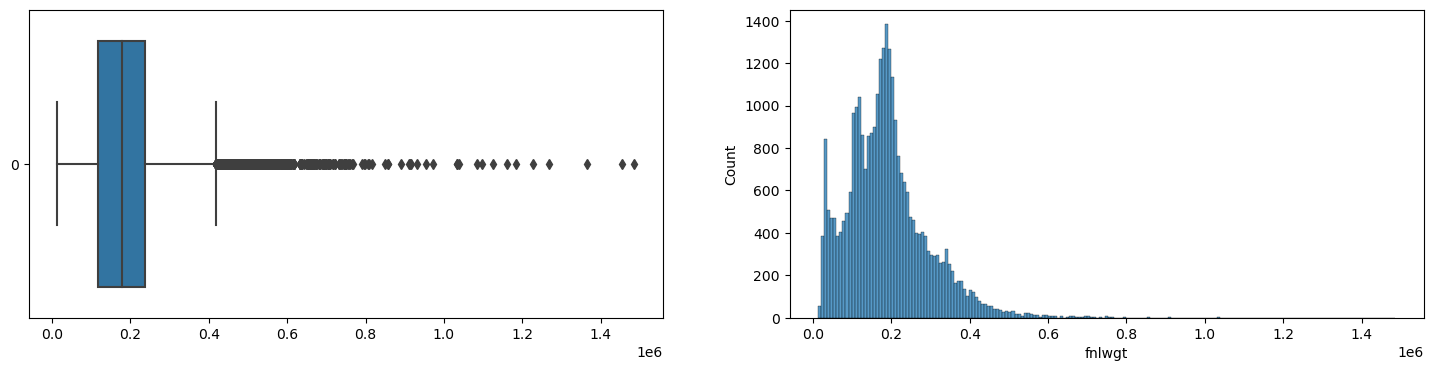

In [17]:
print_numerical_predictor('fnlwgt')

#### education-num

Important Data for education-num 

Descriptor         Value
-------------------------
Mean               10.12
Std                2.55
Q1                 9.0
Median             10.0
Q3                 13.0
Outliers           196


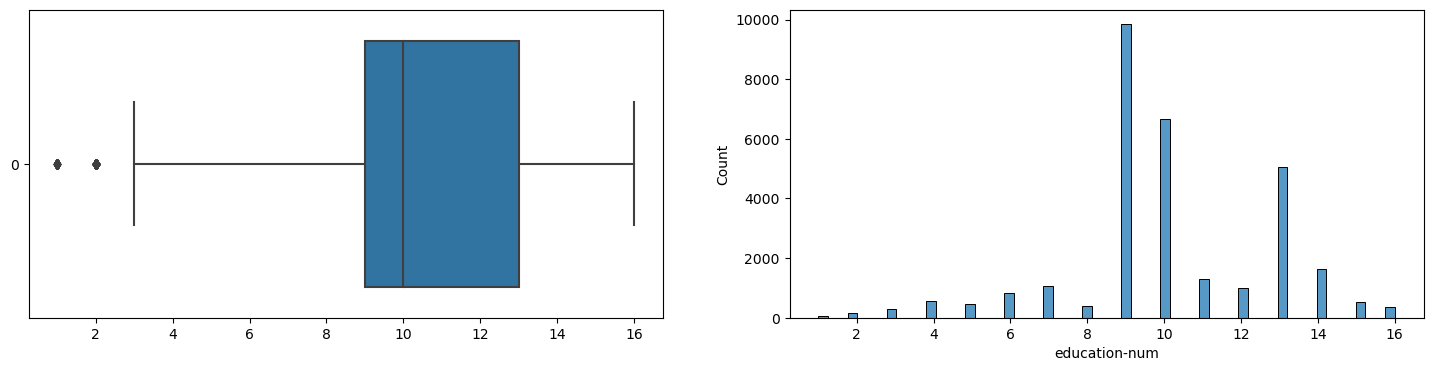

In [18]:
print_numerical_predictor('education-num')

#### capital-gain

Important Data for capital-gain 

Descriptor         Value
-------------------------
Mean               1092.01
Std                7406.35
Q1                 0.0
Median             0.0
Q3                 0.0
Outliers           2538


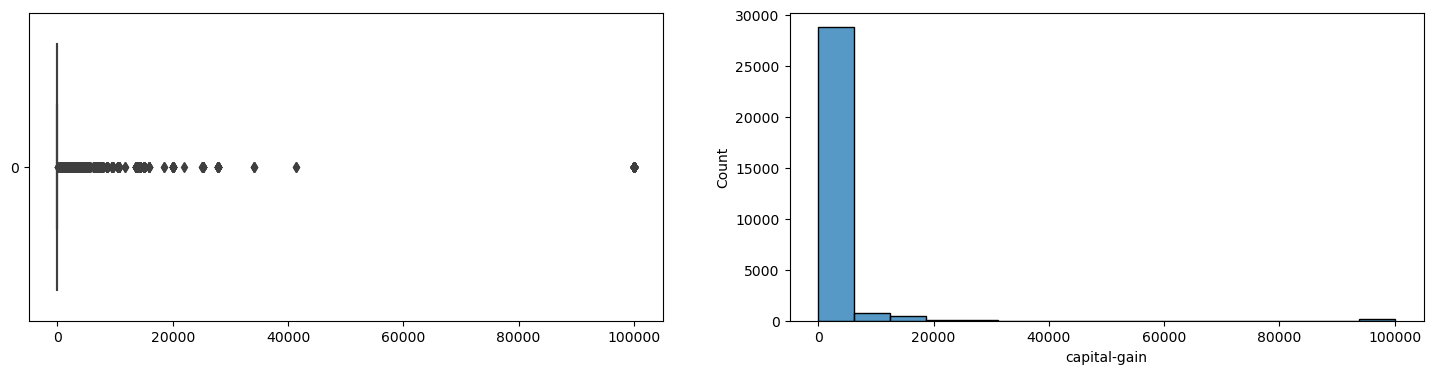

In [19]:
print_numerical_predictor('capital-gain')

#### capital-loss

Important Data for capital-loss 

Descriptor         Value
-------------------------
Mean               88.37
Std                404.30
Q1                 0.0
Median             0.0
Q3                 0.0
Outliers           1427


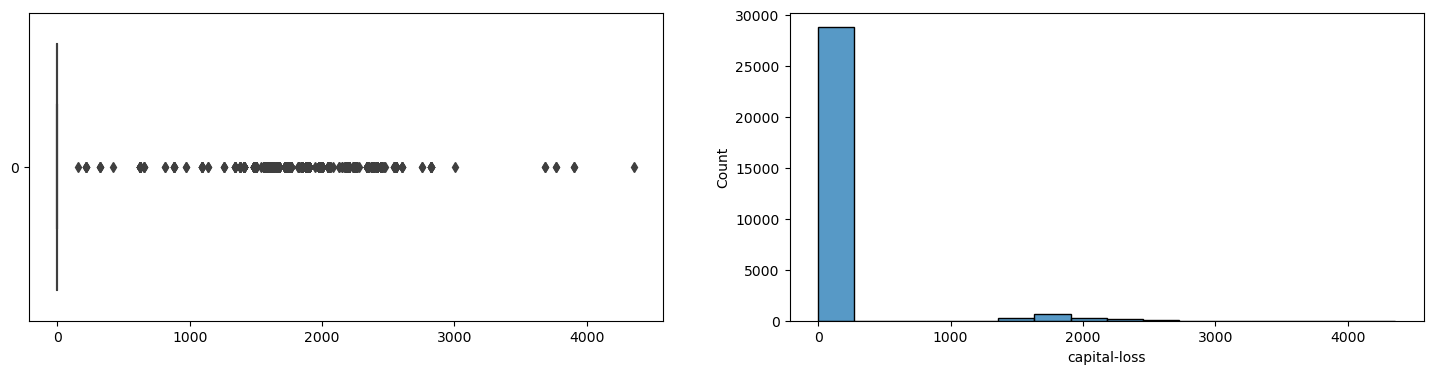

In [20]:
print_numerical_predictor('capital-loss')

#### hours-per-week

Important Data for hours-per-week 

Descriptor         Value
-------------------------
Mean               40.93
Std                11.98
Q1                 40.0
Median             40.0
Q3                 45.0
Outliers           7953


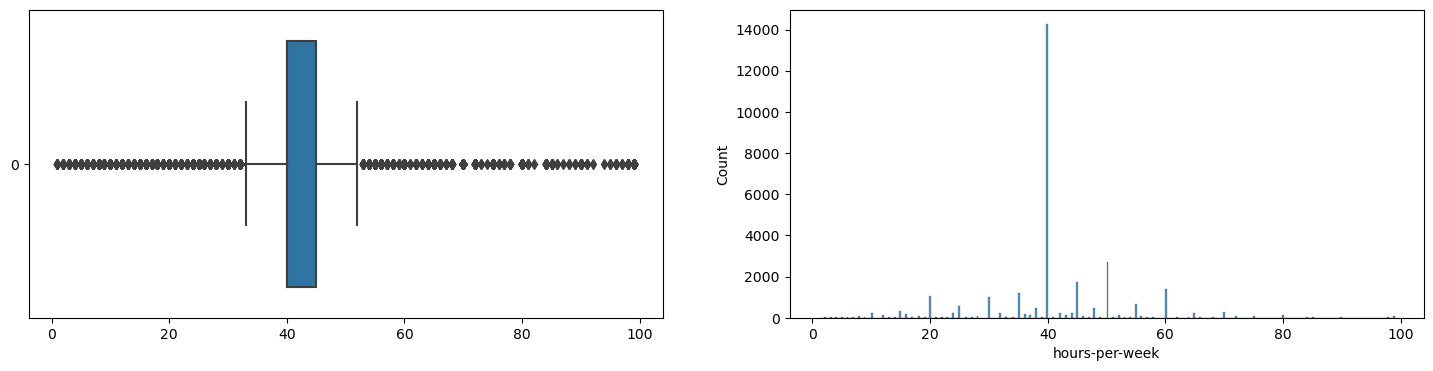

In [21]:
print_numerical_predictor('hours-per-week')

### 5.3. Exploring the Catergorical Predictors

#### workclass

Number of unique values for workclass 

Unique Values      7 

****************************************
 Label                   Count
------------------------------
 Private                22286
 Self-emp-not-inc       2499
 Local-gov              2067
 State-gov              1279
 Self-emp-inc           1074
 Federal-gov            943
 Without-pay            14


C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


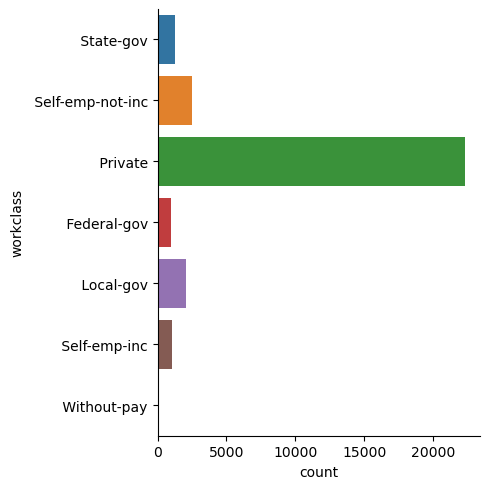

In [22]:
def print_catergorical_predictor(c_p):
    sns.catplot(y = c_p, data = adult_data, kind = "count")
    print("Number of unique values for",c_p,"\n")
    i = 'Unique Values'
    x = 17 - len(i)
    print(i,x * ' ',adult_data[c_p].nunique(),'\n')
    separate()
    print(" Label", 17*' ', "Count")
    print("-"*30)
    ecp_data_value = adult_data[c_p].value_counts().keys().tolist()
    ecp_data_counts = adult_data[c_p].value_counts().tolist()
    
    for ecp_counter in range(len(ecp_data_value)):
        i = ecp_data_value[ecp_counter]
        i = str(i)
        x = 22 - len(i)
        print(i,x * ' ',ecp_data_counts[ecp_counter])
        
print_catergorical_predictor('workclass')

#### education

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Number of unique values for education 

Unique Values      16 

****************************************
 Label                   Count
------------------------------
 HS-grad                9840
 Some-college           6678
 Bachelors              5044
 Masters                1627
 Assoc-voc              1307
 11th                   1048
 Assoc-acdm             1008
 10th                   820
 7th-8th                557
 Prof-school            542
 9th                    455
 12th                   377
 Doctorate              375
 5th-6th                288
 1st-4th                151
 Preschool              45


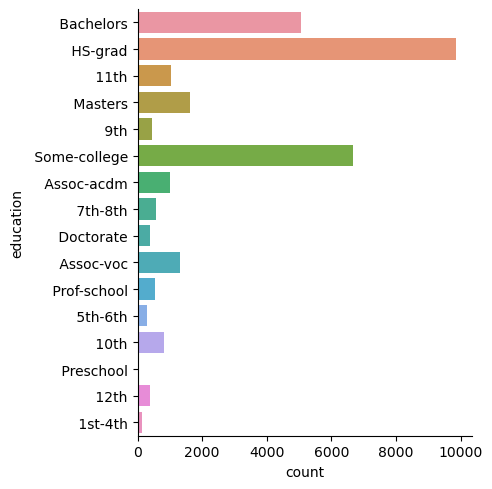

In [23]:
print_catergorical_predictor('education')

#### marital-status

Number of unique values for marital-status 



C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Unique Values      7 

****************************************
 Label                   Count
------------------------------
 Married-civ-spouse     14065
 Never-married          9726
 Divorced               4214
 Separated              939
 Widowed                827
 Married-spouse-absent  370
 Married-AF-spouse      21


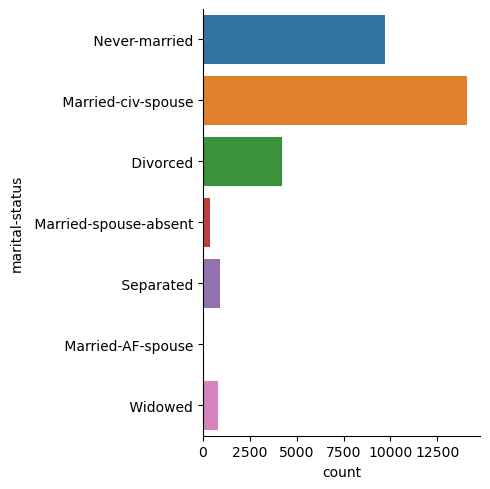

In [24]:
print_catergorical_predictor('marital-status')

#### occupation

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Number of unique values for occupation 

Unique Values      14 

****************************************
 Label                   Count
------------------------------
 Prof-specialty         4038
 Craft-repair           4030
 Exec-managerial        3992
 Adm-clerical           3721
 Sales                  3584
 Other-service          3212
 Machine-op-inspct      1966
 Transport-moving       1572
 Handlers-cleaners      1350
 Farming-fishing        989
 Tech-support           912
 Protective-serv        644
 Priv-house-serv        143
 Armed-Forces           9


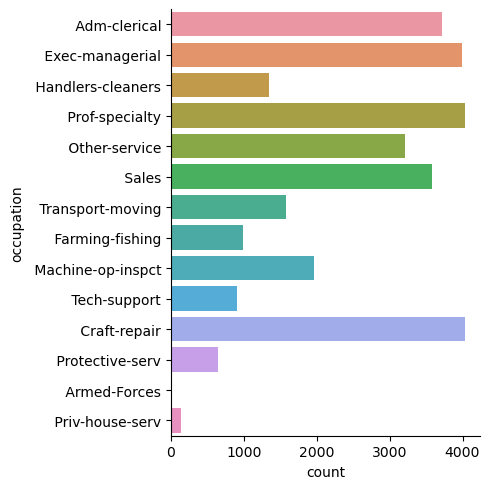

In [25]:
print_catergorical_predictor('occupation')

#### relationship

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Number of unique values for relationship 

Unique Values      6 

****************************************
 Label                   Count
------------------------------
 Husband                12463
 Not-in-family          7726
 Own-child              4466
 Unmarried              3212
 Wife                   1406
 Other-relative         889


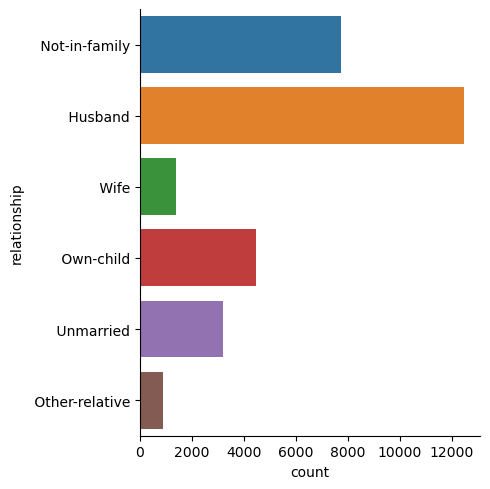

In [26]:
print_catergorical_predictor('relationship')

#### race

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Number of unique values for race 

Unique Values      5 

****************************************
 Label                   Count
------------------------------
 White                  25933
 Black                  2817
 Asian-Pac-Islander     895
 Amer-Indian-Eskimo     286
 Other                  231


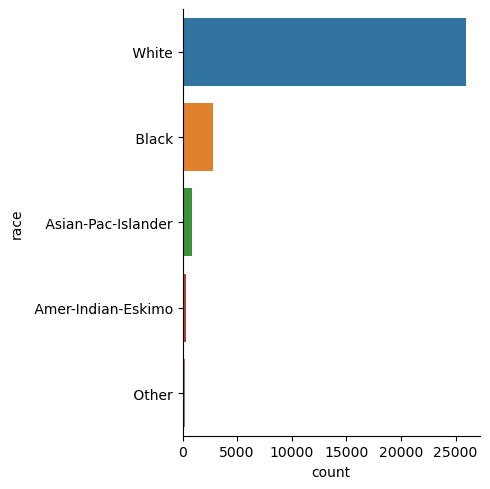

In [27]:
print_catergorical_predictor('race')

#### sex

Number of unique values for sex 

Unique Values      2 

****************************************
 Label                   Count
------------------------------
 Male                   20380
 Female                 9782


C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


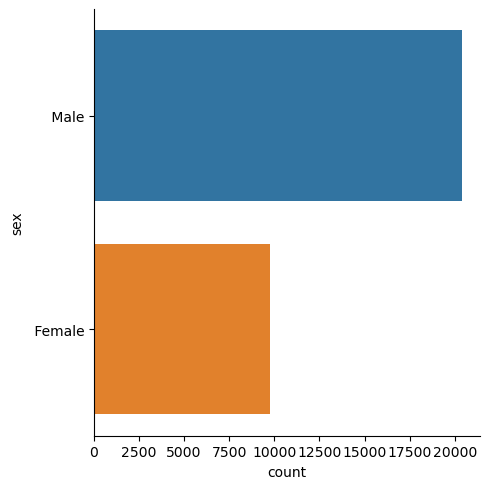

In [28]:
print_catergorical_predictor('sex')

#### native-country

Number of unique values for native-country 

Unique Values      41 

****************************************
 Label                   Count
------------------------------
 United-States          27504
 Mexico                 610
 Philippines            188
 Germany                128
 Puerto-Rico            109
 Canada                 107
 India                  100
 El-Salvador            100
 Cuba                   92
 England                86
 Jamaica                80
 South                  71
 China                  68
 Italy                  68
 Dominican-Republic     67
 Vietnam                64
 Guatemala              63
 Japan                  59
 Poland                 56
 Columbia               56
 Iran                   42
 Taiwan                 42
 Haiti                  42
 Portugal               34
 Nicaragua              33
 Peru                   30
 Greece                 29
 France                 27
 Ecuador                27
 Ireland                24
 Hong   

C:\Users\gaymi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


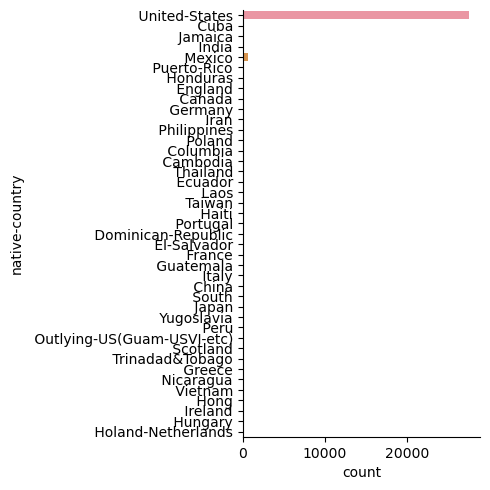

In [29]:
print_catergorical_predictor('native-country')

### 5.4. Relationship Exploration with Zhabor

In [30]:
"""
things to minimally do in EDA:
1. find out education-num is mapped education
2. find out fnlwgt doesnt affect label (probs use corr or something).
MORE but idk what yet.
"""

'\nthings to minimally do in EDA:\n1. find out education-num is mapped education\n2. find out fnlwgt doesnt affect label (probs use corr or something).\nMORE but idk what yet.\n'

In [31]:
# I aint gonna touch EDA anytime soon - jc
# I want to explore relationship with zhabor - mk

## Chapter 6. Feature Engineering

Perform (based on notes collected in earlier chapters):
- One-hot encode all categorical variables: </br>
  `workclass`, `education`, `marital-status`,
  `occupation`, `relationship`, `race`, `sex`, `native-country`, and `income`.
- Drop `fnlwgt` and `education-num`.


### 6.1. Encode `workclass`

In [32]:
# Check the spread and all the possible values of the feature.
adult_data.workclass.value_counts()

workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

In [33]:
# Judging from the spread, we can further group this feature to: 
# "Private", "Public" (those with "gov"), "Self-Employed" (those with "self"), and "Others" ("Without-pay").
# Then encode them.
# Define the mapping dictionary
workclass_dict = {
    " Without-pay": 0, 
    " Private": 1, 
    " Self-emp-not-inc": 2, 
    " Self-emp-inc": 2, 
    " Local-gov": 3, 
    " State-gov": 3, 
    " Federal-gov" : 3
}

# Replace values using the mapping dictionary
adult_data["workclass"] = adult_data["workclass"].replace(workclass_dict)

# Check.
adult_data["workclass"].value_counts()

workclass
1    22286
3     4289
2     3573
0       14
Name: count, dtype: int64

### 6.2. Encode `education`

### 6.3. Encode `marital-status`

### 6.4. Encode `occupation`

In [34]:
# Check the spread and all the possible values of the feature.
adult_data.occupation.value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

### 6.5. Encode `relationship`

In [35]:
# Check the spread and all the possible values of the feature.
adult_data.relationship.value_counts()

relationship
 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: count, dtype: int64

In [36]:
# Judging from the spread, we can further group this feature to "Married" ("Husband" or "Wife") and "Others" (the rest).
adult_data["relationship"] = adult_data["relationship"].apply(lambda x: 1 if " Husband" in x or " Wife" in x else 0)

# Check.
adult_data.relationship.value_counts()

relationship
0    16293
1    13869
Name: count, dtype: int64

### 6.6. Encode `race`

In [37]:
# Check the spread and all the possible values of the feature.


### 6.7. Encode `sex`

In [38]:
# Check the spread and all the possible values of the feature.
adult_data.sex.value_counts()

sex
 Male      20380
 Female     9782
Name: count, dtype: int64

In [39]:
# Map "Male" = 0, "Female" = 1.
adult_data["sex"] = adult_data["sex"].map({" Male": 0, " Female": 1}) 

# Check.
adult_data.sex.value_counts()

sex
0    20380
1     9782
Name: count, dtype: int64

### 6.8. Encode `native-country`

In [40]:
# Check the spread and all the possible values of the feature.


### 6.9. Encode `income`

In [41]:
# Check the spread and all the possible values of the label.
adult_data.income.value_counts()

income
 <=50K    22654
 >50K      7508
Name: count, dtype: int64

In [42]:
# Map `income`: "<=50K" = 0, `>50K` = 1.
adult_data["income"] = adult_data["income"].map({" <=50K": 0, " >50K":1}) 

# Check.
adult_data.income.value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

### 6.10. Drop Redundant Features

In [43]:
adult_data = adult_data.drop(
    ["fnlwgt", 'education-num'], axis=1)

## Chapter 7. Modelling

In [44]:
adult_data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,3,Bachelors,Never-married,Adm-clerical,0,White,0,2174,0,40,United-States,0
1,50,2,Bachelors,Married-civ-spouse,Exec-managerial,1,White,0,0,0,13,United-States,0
2,38,1,HS-grad,Divorced,Handlers-cleaners,0,White,0,0,0,40,United-States,0
3,53,1,11th,Married-civ-spouse,Handlers-cleaners,1,Black,0,0,0,40,United-States,0
4,28,1,Bachelors,Married-civ-spouse,Prof-specialty,1,Black,1,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,1,Assoc-acdm,Married-civ-spouse,Tech-support,1,White,1,0,0,38,United-States,0
32557,40,1,HS-grad,Married-civ-spouse,Machine-op-inspct,1,White,0,0,0,40,United-States,1
32558,58,1,HS-grad,Widowed,Adm-clerical,0,White,1,0,0,40,United-States,0
32559,22,1,HS-grad,Never-married,Adm-clerical,0,White,0,0,0,20,United-States,0
